# Homework #1

**Due in class on Friday January 25, 2019**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


Student: Adam Ten Hoeve

## A. Theoretical Problems

### Problem A.1


Suppose that $X_1,...,X_n \overset{iid}{\sim}N(\mu, \sigma^2)$ and we are interested in an estimator for $\theta = \mu^2$. (Note that we will use the following calculuations to make comparisons to the parametric boostrap method explored below).

#### (a) Find the maximum likelihood estimator for $\theta$, denoted $\widehat{\theta}$.

We want to find the $\theta$ that maximizes that probability function. Note that the data comes from a normal distribution so one data point would come from the function: 

$$ f(X; \mu^2) = \dfrac{1}{\sqrt{2\pi \sigma^2}}*e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

Since we have $n$ datapoints, we will multiply the probability functions together. This represents the probability of observing all of the observed data given the distribution.

$$ f(X_1,...,X_n ; \mu^2) = \dfrac{1}{(2\pi \sigma^2)^{n/2}}*e^{-\dfrac{\sum_{i=1}^{n} \Big(x_i-\mu \Big)^2}{2\sigma^2}} $$

To find the MLE, we will want to take the derivative of the above function and set it equal to zero. That would take some really ugly math so we can simplify it by taking the $\log$ of both sides because logs are strictly monotonic functions.

$$ NLL = \ln \Big[ f(X_1,...,X_n ; \mu^2) \Big] = -\Big(\frac{n}{2}\Big)\ln(2\pi \sigma^2) - \Big(\frac{1}{2\sigma^2}\Big) \sum_{i=1}^n \Big(x_i-\mu \Big)^2$$

Solve for $MLE(\mu) = \frac{df}{d\mu}$ and setting it equal to zero.

$$ \frac{\partial NLL}{d\mu} = 0 = \dfrac{\partial(-\Big(\frac{n}{2}\Big)\ln(2\pi \sigma^2) - \Big(\frac{1}{2\sigma^2}\Big) \sum_{i=1}^n \Big(x_i-\mu \Big)^2)}{\partial \theta} $$

Note that the summation derives as:
$$\partial [(x_1 - \mu)^2 + ...+(x_n -\mu)^2 ]= 2(x_1 - \mu)^2(-1) + ... + 2(x_n - \mu)(-1)= -2\sum_{i=1}^n x_i - \mu $$

Plugging this back in:

$$ 0 = \frac{-1}{2\sigma^2}(-2)\sum_{i=1}^n x_i - /u $$

$$ 0 = \sum_{i=1}^n x_i - \mu $$

$$ 0 = \sum_{i=1}^n x_i - \sum_{i=1}^n \mu $$

$$ n\mu = \sum_{i=1}^n x_i $$

$$ \mu = \frac{1}{n} \sum_{i=1}^n x_i $$

Plug in $\theta = \mu^2$

$$ \sqrt{\theta} = \frac{1}{n} \sum_{i=1}^n x_i $$

$$ \boxed{ \hat{\theta} = \Big( \frac{1}{n} \sum_{i=1}^n x_i \Big)^2 } $$

Note that the equation inside the parenthesis is the same as the equation for $\bar{x}$.

#### (b) Compute the bias of $\widehat{\theta}$, denoted $Bias(\widehat{\theta})$.

We can compute the bias using the equation $Bias(\hat{\theta}) = E(\hat{\theta}) - \theta $. First, we substitute $\hat{\theta} \rightarrow \bar{x}^2$ and note that finding $E[\bar{x}^2]$ would be difficult so instead we can use the equation $ Var(\bar{x}) = E[\bar{x}^2] - E[\bar{x}]^2 \rightarrow E[\bar{x}^2] = Var(\bar{x}) + E[\bar{x}]^2.$ Therefor $Bias(\hat{\theta}) = Var(\bar{x}) + E[\bar{x}]^2 - \theta$.

Let's first solve for $E[\bar{x}]$.

$$ E[\bar{x}] = E[\frac{1}{n} \sum_{i=1}^n x_i ] $$

$$ = \frac{1}{n} \sum_{i=1}^n E[x_i] $$

Because we know that the data is iid and comes from a normal distribution, we know that the expectation of each sampling is $\mu$.

$$ = \frac{1}{n} \sum_{i=1}^{n} \mu $$

$$ = \mu $$

Now let's solve for $Var(\bar{x}).$

$$ Var(\bar{x}) = Var(\frac{1}{n} \sum_{i=1}^n x_i ) $$

$$ = \frac{1}{n^2} \sum_{i=1}^n Var( x_i ) $$

$$ = \frac{1}{n^2} \sum_{i=1}^n \sigma^2 $$

$$ = \frac{1}{n^2} (n\sigma^2) $$

$$ = \frac{\sigma^2}{n} $$

Now lets plug these values into our origional equation.

$$ \boxed{ Bias(\hat{\theta}) = Var(\bar{x}) + E[\bar{x}]^2 - \theta = \frac{\sigma^2}{n} + \mu^2 - \mu^2 = \frac{\sigma^2}{n} }$$

#### (c) (STAT 5010 Only) Compute the variance of $\widehat{\theta}$, denoted $Var(\widehat{\theta})$.

#### (d) Write down the natural estimates of $Bias(\widehat{\theta})$ and $Var(\widehat{\theta})$ (we wrote these formulas down in class).

Bias: $ Bias_{\hat{f}}(\hat{\theta}) \approx \frac{1}{\beta} \sum_{i=1}^{\beta} \hat{\theta}_i^* - \hat{\theta} $

Variance: $ Var_{\hat{f}}(\hat{\theta}) \approx \frac{1}{1-\beta} \sum_{i=1}^{\beta} (\hat{\theta}_i^* - \bar{\theta}^*) ^2$ where $ \bar{\theta}^* = \frac{1}{\beta} \sum_{i=1}^{\beta} \hat{\theta}_i^* $

### Problem A.2

#### Provide a brief explanation of the pros and cons of using the bootstrap for calculating confidence intervals.

**Pros:**
- Can be performed on small data sets.
- The sample data does not need to be normally distributed.
- Can be used to perform CI's for many different parameters, not just the mean of the data. 

**Cons:**
- Because the bootstrap method uses already sampled data, if the data has extreme or outlier data, then that will be reflected in the resamples.
- Computationally expensive if used on large data sets because of the number of resamples.

## B. Computational Problems

### Problem B.1

#### Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$. Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.

*Note: In this example, use the parameterization of the gamma distribution that R uses. This is different from the one used in STAT 4520/5520 math stat (the $\beta$ here is $1/\beta$ from math stat).*

#### (a) State why a $\chi^2$ confidence interval is not valid in this context.


The $\chi^2$ test for variance requires the data to be normally distributed. Because the data is taken from the gamma distribution, a $\chi^2$ test is not applicable.

#### (b) Generate a sample of size $n = 8$ from $\Gamma(\alpha = 1, \beta = 1/3)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).


In [43]:
n = 8
smpl = rgamma(n = n, shape = 1, scale = 3)
smpl

[1]  0.8197165  4.2028828  1.6209815  9.2980566 14.5287552  2.7355332  1.2505245
[8]  0.6969736

The standard deviation of this distribution should be $\sqrt{\alpha / \beta^2} = \sqrt{1 / (1/3)^2} = 3 $

#### (c) Generate $B = 200$ bootstrap samples from the above sample. Print the dimension, and articulate what each row/column represents. Avoid loops! (HINT: use the replicate() function.)


In [44]:
B = 200
resamples = replicate(B, sample(smpl, size = n, replace = TRUE))
resamples
dim(resamples)

4.2028828,1.2505245,0.8197165,1.2505245,1.6209815,0.8197165,9.2980566,1.2505245,1.2505245,4.2028828,...,0.6969736,14.5287552,1.6209815,4.2028828,14.528755,0.6969736,14.528755,9.2980566,2.7355332,4.2028828
2.7355332,0.8197165,1.6209815,14.5287552,2.7355332,1.2505245,1.2505245,1.6209815,4.2028828,1.2505245,...,4.2028828,0.6969736,1.2505245,4.2028828,4.202883,9.2980566,1.250525,1.2505245,1.6209815,0.8197165
0.8197165,0.8197165,0.8197165,14.5287552,1.2505245,2.7355332,0.6969736,14.5287552,2.7355332,1.6209815,...,2.7355332,14.5287552,2.7355332,0.6969736,1.250525,0.6969736,1.250525,1.6209815,0.8197165,0.8197165
4.2028828,1.2505245,0.8197165,2.7355332,0.6969736,2.7355332,4.2028828,0.8197165,0.8197165,4.2028828,...,1.6209815,1.6209815,0.8197165,4.2028828,14.528755,9.2980566,4.202883,1.6209815,1.6209815,2.7355332
9.2980566,14.5287552,1.2505245,4.2028828,2.7355332,9.2980566,2.7355332,2.7355332,9.2980566,4.2028828,...,0.8197165,1.2505245,0.6969736,14.5287552,1.620982,2.7355332,2.735533,2.7355332,4.2028828,2.7355332
2.7355332,1.2505245,1.2505245,1.6209815,9.2980566,1.6209815,1.2505245,0.8197165,9.2980566,4.2028828,...,2.7355332,1.2505245,1.2505245,4.2028828,1.250525,2.7355332,1.620982,1.2505245,0.6969736,0.6969736
1.2505245,2.7355332,1.6209815,1.6209815,1.6209815,14.5287552,0.8197165,14.5287552,2.7355332,0.8197165,...,0.6969736,1.6209815,4.2028828,0.6969736,2.735533,0.8197165,1.250525,0.8197165,0.8197165,4.2028828
0.8197165,1.6209815,1.6209815,0.8197165,2.7355332,9.2980566,14.5287552,1.6209815,1.2505245,2.7355332,...,4.2028828,9.2980566,9.2980566,14.5287552,9.298057,4.2028828,1.250525,4.2028828,0.6969736,0.6969736


[1]   8 200

The resamples matrix is 8 rows by 200 columns. This is because each column represents a single resampling of the data, with replacement, so the 200 columns are 200 resamples. There are 8 rows because each resample is the same size as the original sample.

#### (d) Calculate and print the MLE of $\theta$ for the original sample. Denote this as $\widehat{\theta}$. Then, calculate the MLE of $\theta$ for each bootstrap sample. Denote this as $\widehat{\theta}^*_i$, for $i = 1,...,B$. Avoid loops! (HINT: use the apply() function.) Display a histogram of these values.

In [45]:
# Calculate the standard deviation of the original sample.
thetaHat = sqrt((n-1) / n) * sd(smpl)
cat ("Theta-hat is ", thetaHat)

Theta-hat is  4.657852

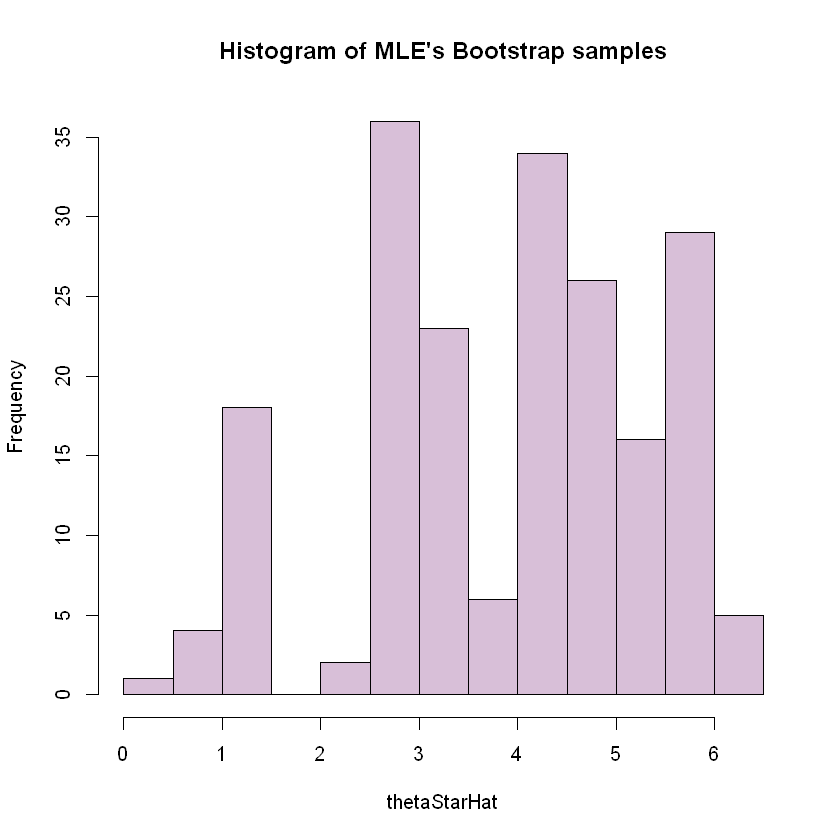

In [46]:
# Calculate the standard deviation of the bootstrap samples.
thetaStarHat = sqrt((n-1) / n) * apply(resamples, 2, sd)
hist(thetaStarHat,
     main = "Histogram of MLE's Bootstrap samples",
     col = "thistle")

#### (e) Use the quantile() function to find the 5th and 95th percentile of the distribution of $\widehat{\theta}^*_i$. Use these values to calculate the $90\%$ boostrap confidence interval for $\theta$. 

In [47]:
q = as.numeric(quantile(thetaStarHat, c(0.05, 0.95)))
l = 2*sqrt((n-1) / n) * sd(smpl) - q[2]
u = 2*sqrt((n-1) / n) * sd(smpl) - q[1]
CI = c(l, u)
cat("The 90% bootstrap confidence interval is", CI)

The 90% bootstrap confidence interval is 3.501705 8.116038

#### (f) Interpret this confidence interval.

From the bootstrap, we are 90% confident that the standard deviation lies between $\sim [1.724, 2.625]$. However, our true parameter was 3 which is not covered by the interval. This means that this was one of the 10% of times that the interval would not cover the standard deviation. If we were to run this entire simulation again, we would get a new gamma samples, new bootstrap samples, and a new confidence interval that could contain the true value. 

### Problem B.2

Thus far, we've been looking at the *nonparametric bootstrap*. In this problem, we look at the *parametric bootstrap* as a way of estimating the bias and variance of an estimator $\widehat{\theta} = \bar{X}^2$ of $\theta = \mu^2$ (in problem A.1 you calculated these values exactly).

#### (a) Generate $X_1,...,X_{20} \overset{iid}{\sim}N(\mu = 2, \sigma^2 = 1)$, and then forget that you know $\mu$ and $\sigma^2$. Find the sample mean and sample variance. 

In [426]:
# Generate data from normal distribution
n = 20; mu = 2; var = 1;
norm = rnorm(n, mean = mu, sd = sqrt(var))
norm

[1] 1.5041424 1.8075652 1.7212567 2.5756679 2.8249202 1.4434094 2.6437517
 [8] 4.6143946 2.1774336 2.0751160 1.0563301 2.4563025 3.1399113 2.1468331
[15] 1.5511898 1.0072885 3.1048856 2.7116065 0.4879782 2.1176158

In [436]:
# Calculate sample mean and sample variance
xBar = mean(norm)
s2 = var(norm)
cat("The sample mean is", xBar, "and the sample variance is", s2)

The sample mean is 2.15838 and the sample variance is 0.8474205

#### (b) Define $\widehat{N}$ to be the distribution of the variable $X_i$ in the population with the sample estimates plugged in for the unknown population parameters. Write down $\widehat{N}$ based on the data generated in (a). 

$\widehat{N} \sim N(\mu = 2.16,\sigma^2 = 0.847)$

#### (c) Draw $B = 500$ boostrap samples from $\widehat{N}$, and for each bootstrap sample $(X_{1,j},...,X_{20,j})$, compute $$ \widehat{\theta}^*_j = \bigg(\frac{1}{20}\sum^{20}_{i=1}X^*_{i,j}\bigg)^2,$$ where $j = 1,...,B$.

In [439]:
B = 500
boots = replicate(B, rnorm(n, mean = 2.16, sd = 0.9206))
head(boots)
dim(boots)

2.2009014,2.5674043,2.905851,2.8798391,0.7709268,3.6398998,3.445225,0.9775018,0.4475786,2.684184,...,2.126275,1.0394528,1.596173,2.883160,0.7202477,2.538913,2.604464,0.9572377,3.392950,2.3984763
2.8817579,2.8989819,4.534987,2.4976849,3.1774025,3.2678984,1.616447,1.8059803,2.4866129,1.535169,...,2.190724,2.7880646,3.512888,0.726014,2.1612660,2.834950,1.435162,0.7828230,2.692564,0.9184322
2.3466808,0.7811106,2.672120,4.1992500,1.2626090,0.4580309,3.763145,2.8232819,4.2606440,1.651975,...,2.435689,2.5887580,2.992559,2.175228,2.5045968,2.449910,1.901989,3.8692150,2.688134,2.7811811
2.5353510,1.8424557,1.838340,1.6079874,1.7580279,1.6700563,1.815669,3.1352308,1.1843093,2.431862,...,1.515189,0.3708802,1.742102,1.555775,3.2144316,3.013291,2.825032,0.5809042,1.712337,3.5148649
2.5277744,3.0855241,1.621594,1.3000318,2.1533783,1.2002890,1.563634,1.4776879,1.0727042,3.597145,...,1.931360,3.4127816,2.538379,2.889918,1.9511387,2.404022,2.607705,2.3098280,2.516615,2.1342494
0.2401273,1.4784116,1.891476,0.3315975,2.9435270,1.8032963,1.784922,0.7999540,0.4541179,2.422566,...,3.137382,2.8177854,1.081723,2.518250,2.9330252,3.031154,2.936547,4.1310834,2.300092,3.0248680


[1]  20 500

#### (d) Compute an estimate of the bias:

\begin{align*}
\widehat{B}(\widehat{\theta}) \approx \frac{1}{B}\sum^B_{j=1}\widehat{\theta}^*_j - \bar{x}^2.
\end{align*}

Compare this to the exact bias using the formula in problem A.1.

In [440]:
MLE <- function(x){
    return((1/nrow(x)*colSums(x))^2)
}

In [441]:
# Find the bias uning the equation above
thetaStarHat = MLE(boots)
biasHat = (1/B)*sum(thetaStarHat - (xBar^2))
biasHat

[1] 0.04772468

In [442]:
# Biases using equation from 1.A
bias = s2 / n
bias

[1] 0.04237102

The true bias of the population is $\frac{\sigma^2}{n} = \frac{1}{20} = 0.05$.  
The estaimated bias from our sample data is $\frac{s^2}{n} = \frac{0.847}{20} = 0.042$.  
The bias from our 500 bootstrap samples is $\sim 0.048$.

#### (e) Compute an estimate of the variance:

\begin{align*}
\widehat{\text{Var}}(\widehat{\theta}) \approx \frac{1}{B-1}\sum^B_{j=1}\big(\widehat{\theta}^*_j - \bar{\theta} \big)^2,
\end{align*}
where 
\begin{align*}
\bar{\theta} = \frac{1}{B}\sum^B_{j=1}\widehat{\theta}^*_j .
\end{align*}
Compare this to the exact variance using the formula in problem A.1.

#### (f) True or False: For a fixed sample size $n = 20$, as $B$ increases, $\widehat{B}(\widehat{\theta})$ will approach ${B}(\widehat{\theta})$.  That is, for a fixed $n$, the bootstrap estimate of the bias will approach the true bias as the number of bootstrap samples, $B$ increases. You might consider running a simulation to decide!

False. As the number of bootstrap samples increase, the bootstrap bias will converge to the estimated bias, not the true bias.

In [510]:
# Test boostraps of different sizes
B1 = 2000
boots1 = replicate(B1, sample(norm, size = 20, replace = TRUE))
thetaStarHat1 = MLE(boots1)
# Generates the cumulative sum of the estimated error. Can see what the value converges to.
bootsBiasHat = (1/B1)*cumsum(thetaStarHat1 - (xBar^2))
bootsBiasHat

[1]  2.810304e-04  8.852219e-04  8.038062e-04  4.653370e-04  2.094608e-04
[6] -4.258598e-05

### Problem B.3

The "Wisconsin Card Sorting Test" is widely used by psychiatrists, neurologists, and neurophycologists with patients who have a brain injury. Patients with any sort of frontal lobe lesion generally do poorly on the test. The data frame WCST contains the test scores from a group of 50 patients from the *Virgen del Camino* Hospital.
#### (a) Using the code below, load the WCST data and explore whether there is reason to believe that the score data comes from a non-normal distribution. First, create a histogram (use ggplot!) and describe whether the data look normal. Then, use the function shapiro.test() to explore normality. Be sure to explain what this function does--i.e., what's the null and alternative hypothesis--in your answer.

In [462]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


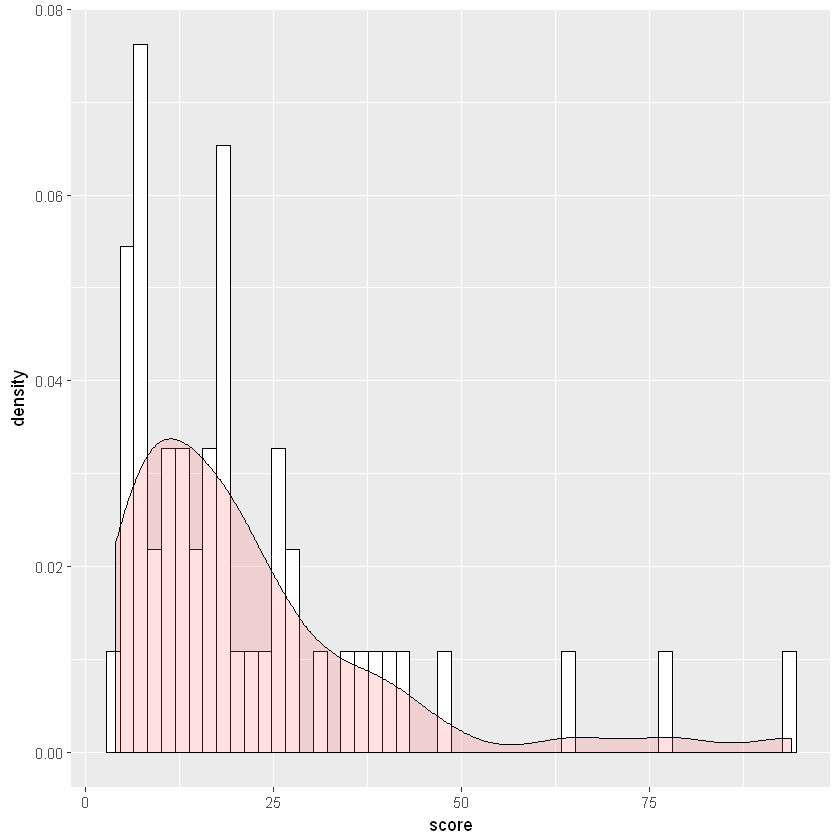

In [491]:
wcst = read.table(file = "WCST.txt")
ggplot(data = wcst, aes(x=score)) + geom_histogram(aes(y=..density..), bins = 50, color = "black", fill = "white") + 
geom_density(alpha=.2, fill="#FF6666") 

In [490]:
shapiro.test(c(wcst)$score)


	Shapiro-Wilk normality test

data:  c(wcst)$score
W = 0.77472, p-value = 2.405e-07


From the plot above, we can see that the data does not clearly follow a normal distribution as it is skewed to the right. This is confirmed by the shapiro.test() function, which performs a normality test and returns a p-value. If the returned p-val > 0.05, then we fail to reject the null and assert that the data came from a normal distribution. When we performed this test, we got a p-value of $2.405e-07$ which is < 0.05, therefor the sample is not from a normal distribution.

#### (b) What assumptions must be made in order to compute a (non-boostrap) 95% confidence interval for the population mean score?

Our assumptions are:
- The data is independent and identically distributed.
- If the number of samples is >30 then can use the Central Limit Theorem.
- If the number of samples is <30, then the population must be normally distributed in order to use non-bootstrap methods.

#### (c) Compute the confidence interval from (b).

In [509]:
# Find the sample mean
WCST = c(wcst)$score
xbar = mean(WCST)
s = sd(WCST)

lower = xbar - 1.96 * s / sqrt(length(WCST))
upper = xbar + 1.96 * s / sqrt(length(WCST))

cat("The 95% confidence interval for the data is [", lower, ",", upper, "]")

The 95% confidence interval for the data is [ 16.37808 , 26.58192 ]

#### (d) Compute a 95% percentile bootstrap pivot confidence interval for the mean. 

In [508]:
# Find the sample mean of the data
xbar = mean(c(wcst)$score)
# Perform the bootstrap
B = 2000
boots = replicate(B, sample(c(wcst)$score, size = nrow(wcst), replace = TRUE))
xBarStar = colMeans(boots)

lower = 2*xbar - as.numeric(quantile(xBarStar, probs = 0.975))
upper = 2*xbar - as.numeric(quantile(xBarStar, probs = 0.025))
cat("The 95% pivot confidence interval is [", lower, ",", upper, "]")

The pivot confidence interval is [ 16.299 , 26.221 ]

### Problem B.4

Load the data frame Animals from the MASS package. Construct a 95% bootstrap *percentile confidence interval* for the correlation coefficient between $\log(brain)$ and $\log(body)$. A percentile confidence interval is simply $$\big[\widehat{\theta}^*_{\alpha/2}, \,\, \widehat{\theta}^*_{1-\alpha/2} \big],$$ where $\widehat{\theta}^*_{\alpha/2}$ is the $\alpha/2$ quantile of the bootstrap distribution. (We note that in many cases, this confidence interval is not as accurate as the pivot interval discussed in class.)

In [24]:
animals = MASS::Animals
head(animals)
nrow(animals)

,body,brain
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0
Guinea pig,1.04,5.5
Dipliodocus,11700.00,50.0


[1] 28

In [25]:
# Construct vector of correlations
B = 5000
correlations = c()
for(i in 1:B){
    # Create bootstrap sample from data set. Same length as original sample
    boots = animals[sample(nrow(animals), nrow(animals), replace = TRUE), ]
    # Calculate the correlation of bootstrap sample
    cor = cor(log(boots$body), log(boots$brain))
    # Add correlation to vector of correlations
    correlations = c(correlations, cor)
}

In [26]:
# Create CI using quatiles
lower = as.numeric(quantile(correlations, probs = 0.025))
upper = as.numeric(quantile(correlations, probs = 0.975))

cat("The 95% confidence interval for the correlation coefficient is [", lower, ",", upper, "]")

The 95% confidence interval for the correlation coefficient is [ 0.5478045 , 0.9548082 ]